# 1. Basic Usage

In this tutorial, I will explain how to use this `interferometry_clean_sim`.
You can understand the usage of it by reading and running this notebook.

### I. import `CLEAN` module

First of all, import `CLEAN` module.

```python
from CLEAN import CLEAN
```

Import other packages as you like.

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colorbar as colorbar
import cv2 as cv

current_dir = os.getcwd()

if 'google.colab' in sys.modules:
    !git clone https://github.com/skrbcr/interferometry_clean_sim.git
    %cd interferometry_clean_sim/example
    sys.path.append('/content/interferometry_clean_sim/')
    current_dir += '/interferometry_clean_sim/example/'
else:
    sys.path.append(os.path.dirname(current_dir))

from CLEAN import CLEAN

`CLEAN` class is what you manage with.
All workflows on this project is packaged in it.

You also have to prepare some images that represents the true target object.
In this example, the target is point source.

`N_antennas` is the number of the antennas in your interferometer.

### II. `CLEAN` class

In [2]:
clean = CLEAN()  # CLEAN class
imagefile = f'{current_dir}/image/point.png'  # true target image
N_antennas = 40  # number of antennas

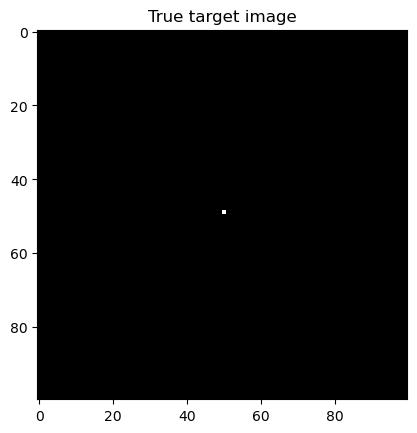

In [3]:
# Show image
fig, ax = plt.subplots()
true_image = cv.imread(imagefile, cv.IMREAD_GRAYSCALE)
im = ax.imshow(true_image, cmap='gray')
ax.set_title('True target image')
plt.show()

### III. Setup your interferometer

You have to configure your interferometer.
You can specify

- The number of the antennas (we specified as `N_antennas` above) as `n_antennas`;
- The shortest baseline length as `b_min`;
- The longest baseline length as `b_max`.

`b_min` and `b_max` must be from 0 to 1 and I recommend that `b_max` should be less than 0.5.

In [4]:
# Configure antenna array
antenna_pos, uv_coverage = clean.set_antenna_array(geometry='random', n_antennas=N_antennas, b_min=0.01)

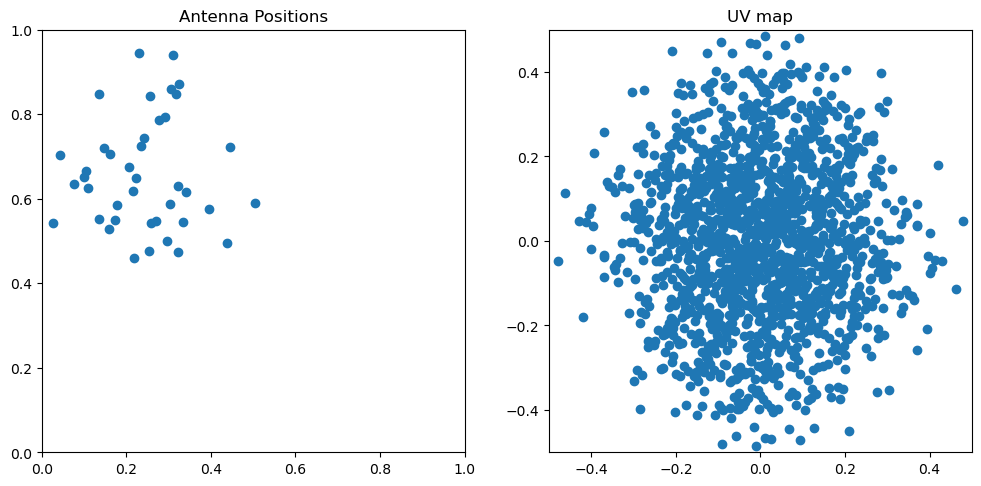

In [5]:
# Plot antenna positions and uv coverage
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
for ax in axs:
    ax.set_aspect('equal', 'box')
axs[0].scatter(antenna_pos[:, 0], antenna_pos[:, 1])
axs[0].set_title('Antenna Positions')
axs[0].set_xlim(0, 1)
axs[0].set_ylim(0, 1)
axs[1].scatter(uv_coverage[:, 0], uv_coverage[:, 1])
axs[1].set_title('UV map')
axs[1].set_xlim(-0.5, 0.5)
axs[1].set_ylim(-0.5, 0.5)
plt.show()

The antenna position is biased but this is not problem since the essential is UV map.

### IV. Create visibility

`create_visibility` actually implements the FFT (Fast Fourier Transform) of the `imagefile`.

In [6]:
# Create visibility
vis, imsize = clean.create_visibility(imagefile=imagefile)

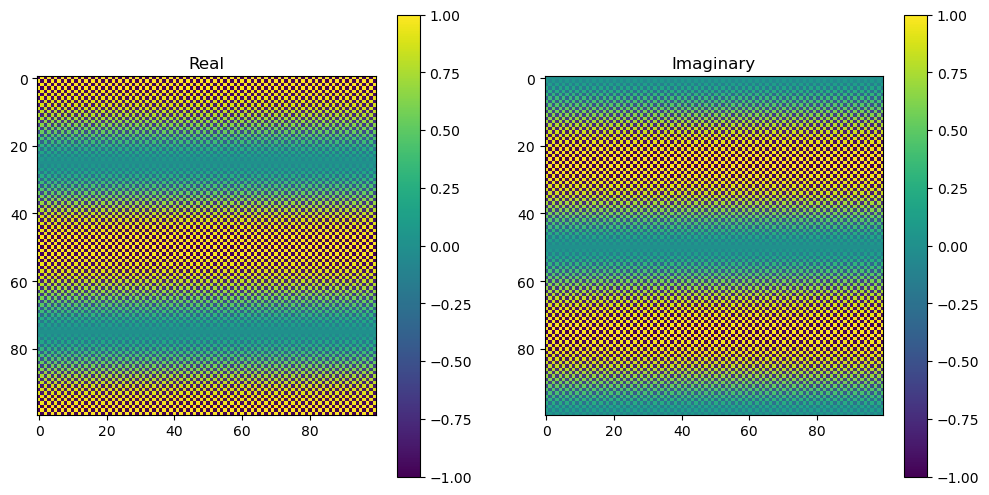

In [7]:
# Plot visibility (fully coverage)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
for ax in axs:
    ax.set_aspect('equal', 'box')
im1 = axs[0].imshow(vis.real)
axs[0].set_title('Real')
im2 = axs[1].imshow(vis.imag)
axs[1].set_title('Imaginary')
plt.colorbar(im1, ax=axs[0])
plt.colorbar(im2, ax=axs[1])
plt.show()

The visibility is fully sampled yet.
In `clean` function, explained in the next part, the visibility will be sampled based on the UV map.

### V. Clean image

Finally, we can run `clean`.
This function creates dirty image and implements clean algorithm to obtain cleaned image.
You can change `n_iter` and `threshold` to observe any change on results.

- `weighting`: `'uniform'` or `'natural'`. I cannot find any drastic change on the results...
- `n_iter`: limit on clean iteration.
- `threshold`: If the max value of residual reaches it, the clean stops.

In [8]:
# clean
psf, model, residual, image = clean.clean(vis=vis, imsize=imsize, weighting='uniform', n_iter=10000, threshold=1e-10)

PSF created.
Iteration 95: Peak value 9.977547430471346e-11 is below threshold 1e-10. Stopping the iteration.


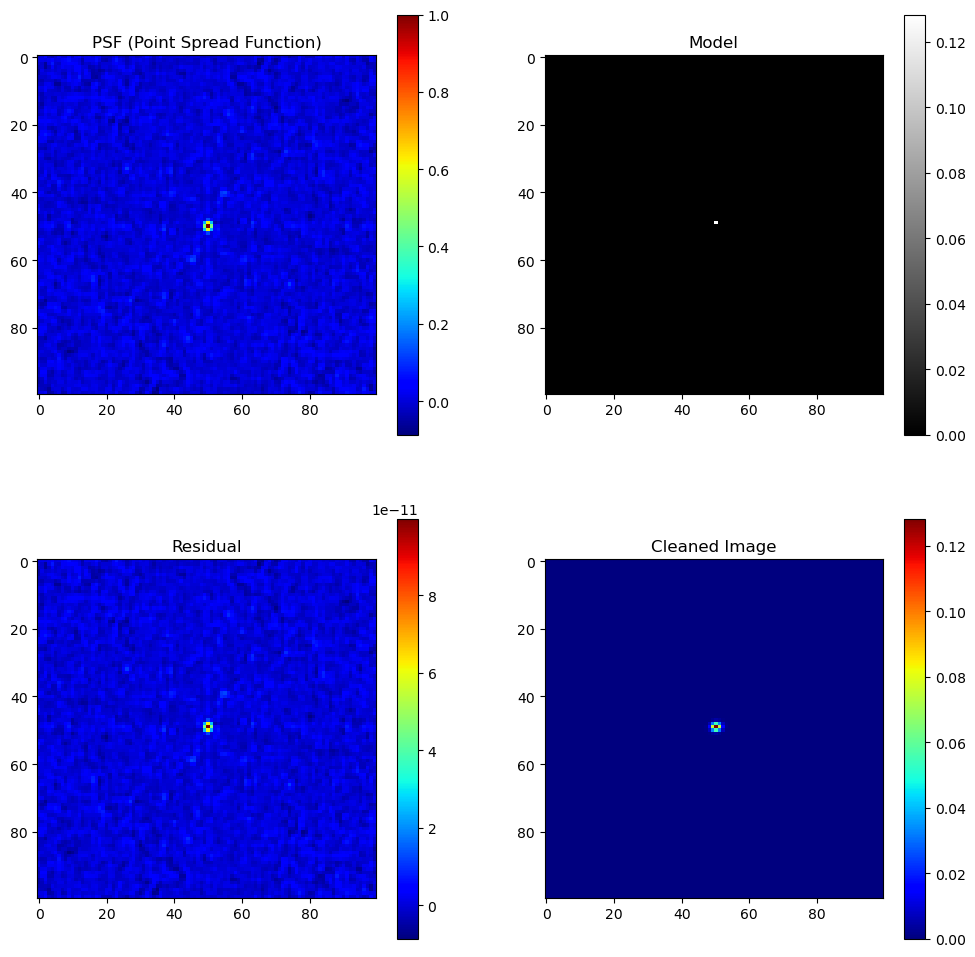

In [9]:
# plot psf, model, residual, cleaned image
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

im1 = axs[0, 0].imshow(psf, cmap='jet')
axs[0, 0].set_title('PSF (Point Spread Function)')
plt.colorbar(im1, ax=axs[0, 0])

im2 = axs[0, 1].imshow(model, cmap='gray')
axs[0, 1].set_title('Model')
plt.colorbar(im2, ax=axs[0, 1])

im3 = axs[1, 0].imshow(residual, cmap='jet')
axs[1, 0].set_title('Residual')
plt.colorbar(im3, ax=axs[1, 0])

im4 = axs[1, 1].imshow(image, cmap='jet')
axs[1, 1].set_title('Cleaned Image')
plt.colorbar(im4, ax=axs[1, 1])